### Cats and Dogs Classifier 

In [3]:
from fastai.vision.all import *
from fastai.callback.progress import ProgressCallback

path = untar_data(URLs.PETS)/'images'

def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed = 42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = vision_learner(dls, resnet34, metrics = error_rate)
try:
    learn.remove_cbs(ProgressCallback)
except Exception:
    learn.cbs = [cb for cb in learn.cbs if not isinstance(cb, ProgressCallback)]

learn.fine_tune(1)


[0, 0.167732372879982, 0.023068498820066452, 0.00811908021569252, '00:55']
[0, 0.04577672854065895, 0.017565028741955757, 0.0067658997140824795, '01:09']


In [4]:
### Test the Model 🐱🐶
# Upload an image to classify whether it's a Cat or Dog!

import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

Is this a cat?: False.
Probability it's a cat: 0.000006
Probability it's a dog: 0.999994


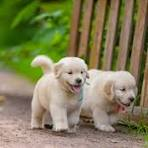

In [6]:
# Get the uploaded image (new ipywidgets API)
img_content = uploader.value[0].content.tobytes()

# Create image from bytes
img = PILImage.create(img_content)

is_cat,_,probs = learn.predict(img)

print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
print(f"Probability it's a dog: {probs[0].item():.6f}")

img.to_thumb(256)